As per task, Created a Reddit account and API keys

Collect data from a subreddit of your choice (at a minimum, collect the posts from the subreddit; optionally collect comments on the posts)

In [92]:
import praw
import pandas as pd
import credentials

The `import credentials` line imports the file `credentials.py` 

Next, we initialize our reddit connection with our credentials.

In [93]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

Now we can select a subreddit of interest. We can use 'all' for all subreddits, but we'll try the Colorado subreddit first. We can select posts by 'top', 'hot', or other viewing options that you see in the web browser too. Then we can set an option for the time frame for some filters such as 'top', and we can use the time filters of all, day, hour, month, week, year (default: all). The PRAW documentation is a little difficult to navigate to find this information, but it's on this page: https://praw.readthedocs.io/en/latest/code_overview/models/subreddit.html#praw.models.Subreddit.search

In [94]:
co_subreddit = reddit.subreddit('poland').hot(limit=10)

This returns a generator object, which is like a list, but we only get the elements when we ask for them, and only one time. So we can loop through the once:

In [95]:
for post in co_subreddit:
    print(post.title, post.score)

the good times 2271
That's how voice-over ("lektor") in films in Poland looks like. A sample with reversed Polish and English languages. 116
Od niepamiętnych czasów Rosja uwielbiała memy o bobrach.  Dlatego tak: 323
Ethnographic map of Poland in 1919 77
NATO conducts major 'Steadfast Defender' exercise in Poland 1
Can anyone discipher what one part of this email means exactly? 3
Forever lost biscuits 235
why double surnames are popular among women in Poland? 173
How do you deal with frustration?  31
Niedziela wieczur 1054


And now if we try to access the elements, they are gone (because we accessed them):

In [96]:
list(co_subreddit)

[]

In [97]:
post

Submission(id='1b5njsm')

In [98]:
post.score

1054

In [99]:
post.title

'Niedziela wieczur'

In [100]:
post.permalink

'/r/poland/comments/1b5njsm/niedziela_wieczur/'

We can save some data of interest, 

In [101]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


co_subreddit = reddit.subreddit('poland').hot(limit=None)

for post in list(co_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [102]:
co_df = pd.DataFrame(reddit_data)

In [121]:
co_df

,title,link,author,n_comments,score,text
0,the good times,/r/poland/comments/1b71beh/the_good_times/,VeryRegularName,181,2268,
1,"That's how voice-over (""lektor"") in films in P...",/r/poland/comments/1b7gmv3/thats_how_voiceover...,Kamil1707,19,115,
2,Od niepamiętnych czasów Rosja uwielbiała memy ...,/r/poland/comments/1b75gbq/od_niepamiętnych_cz...,Pika400,24,326,"Nie słuchaj ich, bobrze, nie jesteś kurwa, jes..."
3,Ethnographic map of Poland in 1919,/r/poland/comments/1b75mj2/ethnographic_map_of...,KotwPaski,16,80,
4,NATO conducts major 'Steadfast Defender' exerc...,/r/poland/comments/1b7ewdi/nato_conducts_major...,EdmontonBest,1,1,
...,...,...,...,...,...,...
204,Returning from work at Żabka,/r/poland/comments/1an2i2m/returning_from_work...,Negative-Fruit-6094,5,125,"I, returning from work at 1 AM from work at Ża..."
205,What did you think of the Tucker Carlson and P...,/r/poland/comments/1amkvhm/what_did_you_think_...,SnipedtheSniper,481,566,
206,"For Poles living in the US or UK, do you hang ...",/r/poland/comments/1amtdjk/for_poles_living_in...,Fine-Upstairs-6284,83,39,Curious to see what others say about this. I g...
207,Potwierdzenie profilu zaufany,/r/poland/comments/1an1qyi/potwierdzenie_profi...,Admirable-Union-9041,4,4,Is there a way to renew this profile online or...


# Save data to sqlite

Now that we have some data collected, we can save it to a database. Sqlite3 is built-in with Python, and saves the data to a file on our hard drive. It's easy to use and set up, although it has limitations. We can save our data like so:

In [122]:
import sqlite3

con = sqlite3.connect("co_reddit.sqlite")
co_df.to_sql('posts', con, if_exists='replace', index=False)

209

We can easily create our DB file by connecting to it (make sure the path exists if you provide a directory/folder like 'data' here). Then we use the to_sql command, giving it a table name, our connection, and a few other arguments. The if_exists can be replace, append, or fail, which do what they say (see the [docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html) for more).

Once our data is saved, we can check that we can load it back:

In [123]:
co_df_check = pd.read_sql_query('SELECT * FROM posts;', con)
# it's best to close the connection when finished
con.close()
co_df_check

,title,link,author,n_comments,score,text
0,the good times,/r/poland/comments/1b71beh/the_good_times/,VeryRegularName,181,2268,
1,"That's how voice-over (""lektor"") in films in P...",/r/poland/comments/1b7gmv3/thats_how_voiceover...,Kamil1707,19,115,
2,Od niepamiętnych czasów Rosja uwielbiała memy ...,/r/poland/comments/1b75gbq/od_niepamiętnych_cz...,Pika400,24,326,"Nie słuchaj ich, bobrze, nie jesteś kurwa, jes..."
3,Ethnographic map of Poland in 1919,/r/poland/comments/1b75mj2/ethnographic_map_of...,KotwPaski,16,80,
4,NATO conducts major 'Steadfast Defender' exerc...,/r/poland/comments/1b7ewdi/nato_conducts_major...,EdmontonBest,1,1,
...,...,...,...,...,...,...
204,Returning from work at Żabka,/r/poland/comments/1an2i2m/returning_from_work...,Negative-Fruit-6094,5,125,"I, returning from work at 1 AM from work at Ża..."
205,What did you think of the Tucker Carlson and P...,/r/poland/comments/1amkvhm/what_did_you_think_...,SnipedtheSniper,481,566,
206,"For Poles living in the US or UK, do you hang ...",/r/poland/comments/1amtdjk/for_poles_living_in...,Fine-Upstairs-6284,83,39,Curious to see what others say about this. I g...
207,Potwierdzenie profilu zaufany,/r/poland/comments/1an1qyi/potwierdzenie_profi...,Admirable-Union-9041,4,4,Is there a way to renew this profile online or...


# Basic EDA on our data

Our data we've collected has text (the title), authors (a categorical variable) and the score and number of comments (numeric). We can make a few plots with these:

- word count plots
- a bar plot of the unique authors
- numeric EDA plots of the number of comments and score, such as histograms, box plots, etc

Let's start with what we already know, which is everything but the word count plots.

<Axes: ylabel='Frequency'>

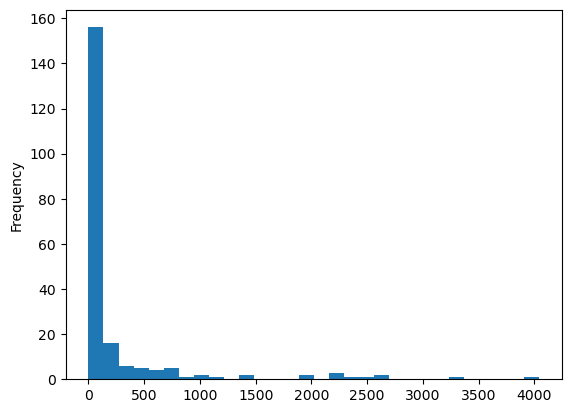

In [124]:
co_df['score'].plot.hist(bins=30)

It looks like the distribution is highly asymmetric, with many posts having a score near 0 (probably because they are new) and a few posts with a very high score. We can look at the highest-scored posts:

In [125]:
co_df[co_df['score'] > 2000]

,title,link,author,n_comments,score,text
0,the good times,/r/poland/comments/1b71beh/the_good_times/,VeryRegularName,181,2268,
43,Poland is so Poland,/r/poland/comments/1b0cw0b/poland_is_so_poland/,Rs_Snab,227,4044,
76,Maria Skłodowska-Curie according to Google's G...,/r/poland/comments/1ax4w6t/maria_skłodowskacur...,TracePoland,274,2590,
98,„apolitical” protest,/r/poland/comments/1avn5b7/apolitical_protest/,RizzmerBlackghore,765,3242,Basically calling for Putin to destroy Ukraine...
120,so is poland safe?,/r/poland/comments/1attfx3/so_is_poland_safe/,TailungFu,434,2258,
158,"Why is it herbata, by the way?",/r/poland/comments/1aqyo2r/why_is_it_herbata_b...,RodionGork,210,2403,
178,"Move over, Freemasons, Jews, Reptilians. We're...",/r/poland/comments/1ao6940/move_over_freemason...,PerunLives,144,2436,
181,Supermarket in Poland,/r/poland/comments/1ao4w7q/supermarket_in_poland/,chungleong,138,2646,
202,"Putin: ""Poland provoked Hitler to start World ...",/r/poland/comments/1amlcmw/putin_poland_provok...,Glittering_Mammoth_6,517,2280,"I'm not Polish, and perhaps I don't have the m..."


By printing out the links like this, we can visit them by putting www.reddit.com in from of them.

In [126]:
co_df[co_df['score'] > 2000]['link'].to_list()

['/r/poland/comments/1b71beh/the_good_times/',
 '/r/poland/comments/1b0cw0b/poland_is_so_poland/',
 '/r/poland/comments/1ax4w6t/maria_skłodowskacurie_according_to_googles_gemini/',
 '/r/poland/comments/1avn5b7/apolitical_protest/',
 '/r/poland/comments/1attfx3/so_is_poland_safe/',
 '/r/poland/comments/1aqyo2r/why_is_it_herbata_by_the_way/',
 '/r/poland/comments/1ao6940/move_over_freemasons_jews_reptilians_were_the/',
 '/r/poland/comments/1ao4w7q/supermarket_in_poland/',
 '/r/poland/comments/1amlcmw/putin_poland_provoked_hitler_to_start_world_war_ii/']

<Axes: >

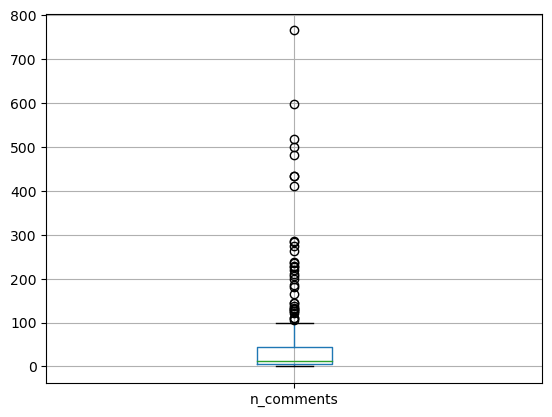

In [127]:
co_df.boxplot('n_comments')

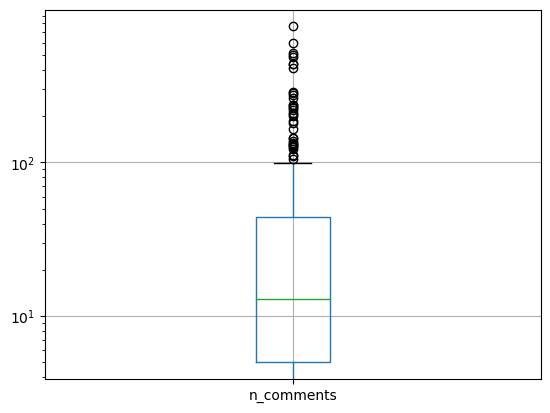

In [128]:
import matplotlib.pyplot as plt
co_df.boxplot('n_comments')
plt.yscale('log')

Again, we see some large outliers for number of comments. A more modern version of the boxplot is the letter-value plot, called a boxenplot in Seaborn (https://seaborn.pydata.org/generated/seaborn.boxenplot.html).

<Axes: xlabel='score', ylabel='n_comments'>

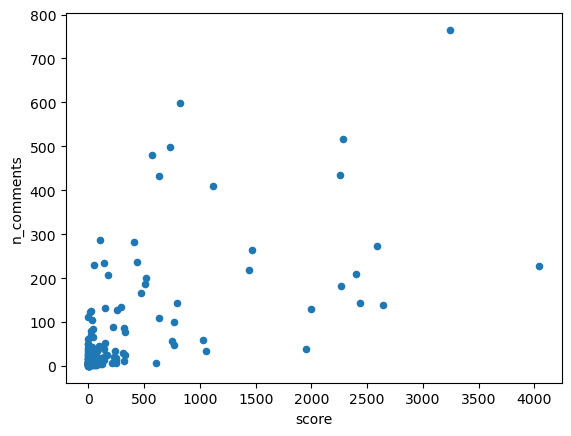

In [129]:
co_df.plot.scatter(x='score', y='n_comments')

We can see a roughly positive relationship between the score and number of comments, as we might expect.

Next, let's look at the frequency counts of users who post things:

<Axes: xlabel='author'>

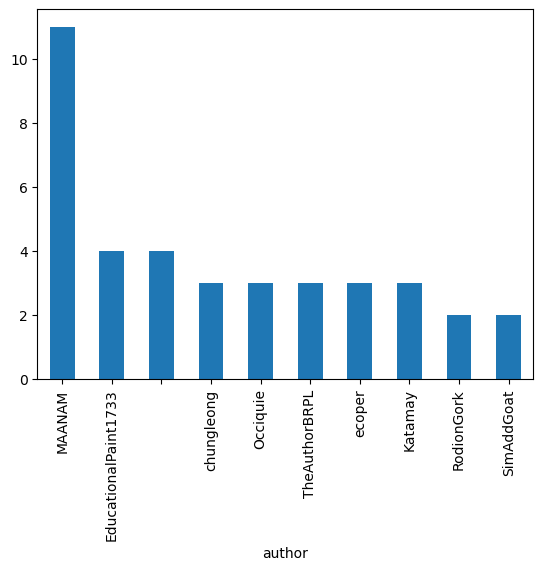

In [130]:
co_df['author'].value_counts()[:10].plot.bar()

In [141]:
co_df[co_df['author'] == 'MAANAM']

,title,link,author,n_comments,score,text
91,"Pigskin nubuck boots - Polish Film Chronicle, ...",/r/poland/comments/1ax4yrl/pigskin_nubuck_boot...,MAANAM,1,9,
101,Hippies from Great Britain are camping in Wars...,/r/poland/comments/1aw5pgu/hippies_from_great_...,MAANAM,1,51,
108,"Behind the scenes of the ""Wheel of Fortune"" - ...",/r/poland/comments/1avb0kl/behind_the_scenes_o...,MAANAM,2,33,
119,"The ""Ewa"" nuclear reactor and the quackery con...",/r/poland/comments/1auhctk/the_ewa_nuclear_rea...,MAANAM,4,102,
137,VHS tapes are conquering Poland - Polish Film ...,/r/poland/comments/1atosor/vhs_tapes_are_conqu...,MAANAM,10,84,
147,How to train bio-energy therapists and what qu...,/r/poland/comments/1asvkxf/how_to_train_bioene...,MAANAM,2,18,
152,Experts claim that rock music is dying. Republ...,/r/poland/comments/1as4fqr/experts_claim_that_...,MAANAM,6,48,
161,"Polish food exported to the USA, 1959 - Polish...",/r/poland/comments/1ar7wuz/polish_food_exporte...,MAANAM,3,69,
169,"Recycling - Polish Film Chronicle, 1979",/r/poland/comments/1apoudr/recycling_polish_fi...,MAANAM,2,48,
191,"Exhibition of the female nude and portrait ""Ve...",/r/poland/comments/1ao8bn7/exhibition_of_the_f...,MAANAM,6,27,


We can then see what these top authors are posting with filtering:

In [142]:
co_df[co_df['author'] == 'Rs_Snab']

,title,link,author,n_comments,score,text
43,Poland is so Poland,/r/poland/comments/1b0cw0b/poland_is_so_poland/,Rs_Snab,227,4044,


Here, we use a few sting methods - join and split. `join()` joins together a list of strings with a character. In this case, we are joining together all the titles with a single space. `split()` splits text on a character we provide as an argument. By default, it splits on any whitespaces (spaces, newlines, tabs, etc).

In [143]:
import nltk

fd = nltk.FreqDist(' '.join(co_df['title']).split())

fd.most_common(20)

[('the', 48),
 ('in', 48),
 ('of', 44),
 ('to', 43),
 ('a', 37),
 ('and', 29),
 ('Polish', 28),
 ('Poland', 27),
 ('for', 24),
 ('-', 22),
 ('I', 19),
 ('from', 19),
 ('on', 18),
 ('is', 15),
 ('you', 13),
 ('with', 12),
 ('about', 11),
 ('my', 10),
 ('it', 10),
 ('so', 8)]

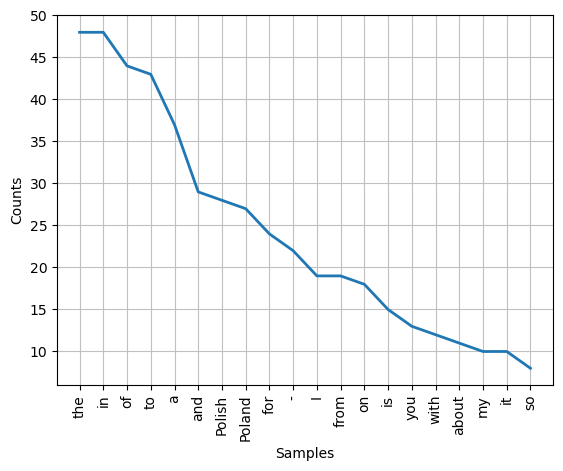

<Axes: xlabel='Samples', ylabel='Counts'>

In [144]:
fd.plot(20)

We can see many of the top words are common words like 'the' and 'in' that don't tell us much. We can get rid of these, but also have some more preprocessing to do. A few things we can do to make our text analysis slightly better is to lowercase all words  and remove stopwords. Stopwords are common words that don't give us much meaning. NLTK, SpaCy, and scikit-learn all have lists of stopwords. We can use NLTK's list, but need to download them first:

In [145]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Then we can import them and look at the stopwords:

In [146]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Notice that they are lowercase and include punctuation. We can remove our stopwords from the text like so. We are lowercasing the full string of titles with the `lower()` built-in string method.

In [147]:
words = ' '.join(co_df['title']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]

In [148]:
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(20)

[('polish', 30),
 ('poland', 29),
 ('-', 22),
 ('help', 9),
 ('question', 9),
 ('need', 8),
 ('film', 7),
 ('poland?', 6),
 ('would', 6),
 ('chronicle,', 6),
 ('new', 5),
 ('border', 5),
 ('good', 4),
 ('buy', 4),
 ('old', 4),
 ('warsaw', 4),
 ('bank', 4),
 ('ukraine', 4),
 ('citizenship', 4),
 ('get', 4)]

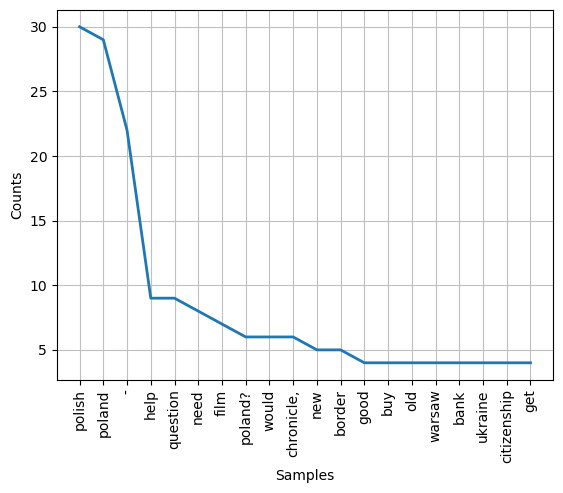

<Axes: xlabel='Samples', ylabel='Counts'>

In [149]:
cleaned_fd.plot(20)

Summary : 

In this project, we undertook a comprehensive analysis focusing on the subreddit community related to Poland. Beginning with the creation of a Reddit account and the acquisition of API keys, we gained access to Reddit's data. Utilizing these credentials, we collected posts and optionally comments from the subreddit, thus compiling a dataset that reflects the discussions and content within the Polish community.

The collected data was then efficiently stored in a SQLite3 database, enabling seamless management and retrieval for subsequent analysis. Employing basic Exploratory Data Analysis (EDA) techniques, we generated at least two plots to gain insights into the subreddit's dynamics.

Our analysis primarily centered around the keyword "Poland," Overall this project provided valuable insights into the behaviors and interests of the Poland subreddit community